### 학습목표
- 손글씨 데이터를 분류하는 딥러닝 모델 설계
- 다중분류 딥러닝 설계
    - 0~9까지 손글씨 데이터를 학습, 예측
    - 10개의 class를 가진다

In [27]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# 데이터 불러오기
# keras에서 제공해주는 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [29]:
# 훈련용, 테스트용 데이터로 이미 나누어져 들어가 있음
# 바로 변수에 대입
(X_train,y_train),(X_test, y_test) = mnist.load_data()

In [30]:
a,b,c,d = 1,2,3,4

In [31]:
a=b=c=4

In [32]:
# 데이터 크기확인
X_train.shape, y_train.shape
# 총 6만개의 학습데이터
# 28*28 픽셀을 가지는 데이터
# 픽셀 : 사진의 정보를 가지는 최소단위

((60000, 28, 28), (60000,))

In [33]:
# 테스트데이터 크기확인
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [34]:
# 정답데이터의 종류 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

3


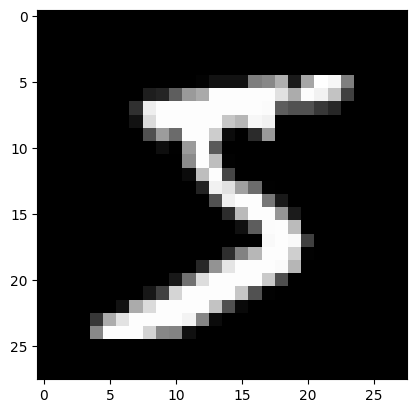

In [35]:
# 문제데이터 -> 손글씨데이터 확인
plt.imshow(X_train[0], cmap='gray')
# 흑백사진
# 얼마나 검정인가 흰색인가에 대한 정보를 가지는 데이터
# 0: 검은색, 255: 흰색
print(y_train[10000])

### MLP모델링
- 입력층의 구조, 출려긍의 구조 설계
- 학습능력을 위한 중간층의 깊이 고혀
- loss, optimizer 설정
- 학습결과 시각화

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Flatten : 2차원의 사진데이터를 선형모델이 처리할 수 있는 1차원 데이터 변경
# 현재 우리의 데이터 2차원(28*28) -> 1차원

In [37]:
# 신경망 모델 설계
# 뼈대 생성
model = Sequential()
# 입력층 설계
model.add(InputLayer(shape=(28,28))) # 28*28의 2차원 데이터
model.add(Flatten()) # 2차원 형태의 사진데이터를 1차원 변경(선형모델학습을 위함)
# 중간층(은닉층)
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
# 출력층 -> 출력데이터의 형태 지정(다중분류)
model.add(Dense(units=10, activation="softmax"))
# 출력층에서의 활성화 함수의 역할 : 출력데이터의 형태 변경
# 분류: 확률값을 출력
# 다중분류 -> 클래스 개수만큼의 확률값이 출력
# softmax함수 : 클래스의 개수만큼의 결과 값이 출력 -> 총합 1인 확률로 변경

##### 정리(예측데이터에 따른 출력층 구성)
- 회귀 (1개의 연속값)
    - units = 1, activation = 'Linear'
- 이진분류 (1개의 확률값 -> 0~1)
    - units = 1, activation ='sigmoid'
- 다중분류 (클래스 개수의 확률값 -> 총합이 1)
    - units = 클래스 개수, activation ='softmax'

In [38]:
# 모델 학습방법 및 평가 방법 설정
model.compile(loss="categorical_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

##### 정리 (학습방법 및 평가방법 설정)
- loss : 학습과정 중 모델의 잘못된 정도를 측정하는 수치
    - 회귀 : mse
    - 이진분류 : binary_crossentropy
    - 다중분류 : categorical_crossentropy
- optimizer : 최적화 함수 -> w,b을 최적화해 나가는 알고리듬
    - 종류가 다양함
    - SGD, adam, momentum ...등
    - 각 함수들의 특징 수업 예정
- metrics : 평가지표
    - 분류 : 정확도(accuracy)
    - 회귀 : mse (평균제곱오차)

In [39]:
# 모델 학습
# model.fit(X_train, y_train,validation_split=0.2,epochs=20)
# 문제 발생!
# 오류를 확인해보니 -> 정답데이터의 shape 가 일치하지 않음!
# shape 가 다르면 학습이 불가
# y_train 데이터를 확인해보니 1개의 결과값(클래스중 1개를 출력)
# 모델링 출력결과 : 10개 클래스에 대한 확률값

In [40]:
y_train[0]

5

In [41]:
# 해결방법 2가지
# [방법 1 : 1개의 정답데이터의 형태를 10개의 확률값으로 변경]

In [42]:
# [방법 1 : 1개의 정답데이터의 형태를 10개의 확률값으로 변경]
from tensorflow.keras.utils import to_categorical
cate_y_train = to_categorical(y_train)
# 범주형 정답데이터를 확률값으로 변경해줌
cate_y_train.shape

(60000, 10)

In [43]:
cate_y_train[0:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
h = model.fit(X_train, cate_y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2553 - loss: 2.1246 - val_accuracy: 0.5443 - val_loss: 1.5222
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.5760 - loss: 1.4180 - val_accuracy: 0.6793 - val_loss: 1.1397
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.6744 - loss: 1.0913 - val_accuracy: 0.7287 - val_loss: 0.9433
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.7074 - loss: 0.9536 - val_accuracy: 0.7553 - val_loss: 0.8318
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.7362 - loss: 0.8588 - val_accuracy: 0.7729 - val_loss: 0.7771
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.7477 - loss: 0.8195 - val_accuracy: 0.7546 - val_loss: 0.7735
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.7579 - loss: 0.7799 - val_accuracy: 0.7971 - val_loss: 0.7108
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.7863 - l

In [45]:
# [방법2 : complie 학습방법을 정의하는 부분에서 loss = 'sparse_categorical_crossentropy']
# sparse를 붙여서 사용 / 더 선호함
# 알아서 들어오는 데이터를 확률값으로 변경하여 비교
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

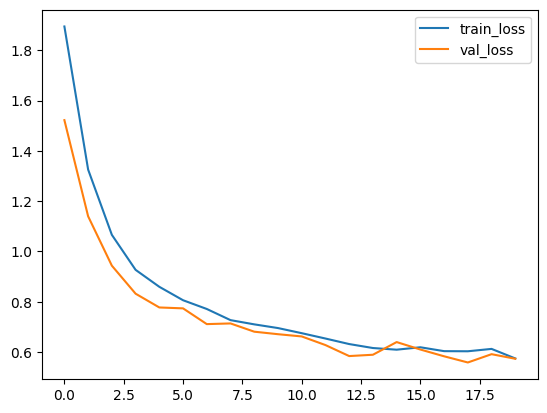

In [46]:
# 학습결과 시각화
plt.plot(h.history['loss'], label = "train_loss")
plt.plot(h.history['val_loss'], label = "val_loss")
plt.legend()
plt.show() 

In [47]:
# 모델 평가
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8203 - loss: 0.6562


[0.5769108533859253, 0.8416000008583069]

In [48]:
# 모델에 대한 전체적인 내부구조 확인
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,650 (25.98 KB)

 Trainable params: 6,650 (25.98 KB)

 Non-trainable params: 0 (0.00 B)

##### 활성화 함수 변천
- step function
    - 미분시 기울기가 없어 미분 불가
- sigmoid
    - 기울기 소실(vanshing Gradient)
    - 층이 깊어지게 되면 오차가 손실
- relu

In [49]:
# 신경망 모델 설계
# 뼈대 생성
model = Sequential()
# 입력층 설계
model.add(InputLayer(shape=(28,28))) # 28*28의 2차원 데이터
model.add(Flatten()) # 2차원 형태의 사진데이터를 1차원 변경(선형모델학습을 위함)
# 중간층(은닉층)
model.add(Dense(units=8, activation='relu')) 
model.add(Dense(units=16, activation='relu')) 
model.add(Dense(units=32, activation='relu')) 
model.add(Dense(units=64, activation='relu')) 
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8, activation='relu'))
# 출력층 -> 출력데이터의 형태 지정(다중분류)
model.add(Dense(units=10, activation="softmax"))
# 출력층에서의 활성화 함수의 역할 : 출력데이터의 형태 변경
# 분류: 확률값을 출력
# 다중분류 -> 클래스 개수만큼의 확률값이 출력
# softmax함수 : 클래스의 개수만큼의 결과 값이 출력 -> 총합 1인 확률로 변경

In [53]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='SGD',
                metrics=['accuracy'])

In [56]:
h2 = model.fit(X_train, y_train, validation_split=0.2,batch_size=64, epochs=20)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6797 - loss: 0.9571 - val_accuracy: 0.6725 - val_loss: 0.9635
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6829 - loss: 0.9418 - val_accuracy: 0.6778 - val_loss: 0.9443
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6778 - loss: 0.9503 - val_accuracy: 0.6808 - val_loss: 0.9326
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6814 - loss: 0.9426 - val_accuracy: 0.6779 - val_loss: 0.9328
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6794 - loss: 0.9454 - val_accuracy: 0.6733 - val_loss: 0.9552
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6834 - loss: 0.9462 - val_accuracy: 0.6712 - val_loss: 0.9510
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6791 - loss: 0.9543 - val_accuracy: 0.6851 - val_loss: 0.9313
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6827 - loss: 0.9357 - val_accuracy: 0.